In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/super_grid_2022.csv')

In [3]:
df.head()

,Date,Voltage_Avg,ActivePower_Avg,ReActivePower_Avg,Current_Avg,Voltage_Fluctuation,Current_Fluctuation,ActivePower_Fluctuation,ReActivePower_Fluctuation
0,2022-01-01 00:00:00+00:00,33.05,13.93,0.50,239.87,0.00,12.00,0.27,0.00
1,2022-01-01 00:30:00+00:00,33.05,14.20,0.50,241.29,0.07,12.00,0.26,0.00
2,2022-01-01 01:00:00+00:00,32.87,14.34,0.51,249.61,0.20,24.00,1.50,0.13
3,2022-01-01 01:30:00+00:00,33.05,15.04,0.84,257.32,0.21,24.06,0.95,0.27
4,2022-01-01 02:00:00+00:00,33.22,13.87,0.69,233.74,0.47,22.31,1.95,0.76


In [4]:
df.shape

(17520, 9)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')

In [6]:
dfn = df[['Date', 'ActivePower_Avg']]

In [7]:
df.head()

,Date,Voltage_Avg,ActivePower_Avg,ReActivePower_Avg,Current_Avg,Voltage_Fluctuation,Current_Fluctuation,ActivePower_Fluctuation,ReActivePower_Fluctuation
0,2022-01-01 00:00:00+00:00,33.05,13.93,0.50,239.87,0.00,12.00,0.27,0.00
1,2022-01-01 00:30:00+00:00,33.05,14.20,0.50,241.29,0.07,12.00,0.26,0.00
2,2022-01-01 01:00:00+00:00,32.87,14.34,0.51,249.61,0.20,24.00,1.50,0.13
3,2022-01-01 01:30:00+00:00,33.05,15.04,0.84,257.32,0.21,24.06,0.95,0.27
4,2022-01-01 02:00:00+00:00,33.22,13.87,0.69,233.74,0.47,22.31,1.95,0.76


In [8]:
dfn['Date'] = pd.to_datetime(dfn['Date'])
dfn['day'] = dfn['Date'].apply(lambda x : x.day)
dfn['month'] = dfn['Date'].apply(lambda x : x.month)
dfn['year'] = dfn['Date'].apply(lambda x : x.year)
dfn['hour'] = dfn['Date'].apply(lambda x : x.hour)
dfn['minute'] = dfn['Date'].apply(lambda x : x.minute)

<ipython-input-8-800dad2d98f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Date'] = pd.to_datetime(dfn['Date'])
<ipython-input-8-800dad2d98f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['day'] = dfn['Date'].apply(lambda x : x.day)
<ipython-input-8-800dad2d98f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [9]:
dfn.head()

,Date,ActivePower_Avg,day,month,year,hour,minute
0,2022-01-01 00:00:00+00:00,13.93,1,1,2022,0,0
1,2022-01-01 00:30:00+00:00,14.20,1,1,2022,0,30
2,2022-01-01 01:00:00+00:00,14.34,1,1,2022,1,0
3,2022-01-01 01:30:00+00:00,15.04,1,1,2022,1,30
4,2022-01-01 02:00:00+00:00,13.87,1,1,2022,2,0


### try regression using only date part

MSE : 38.218422028791196
R2 : 0.1344690327039315


<Axes: xlabel='Date', ylabel='ActivePower_Avg'>

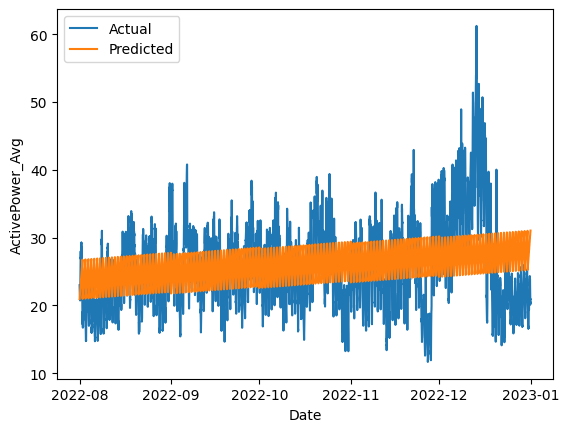

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_df = dfn[dfn['Date'] < '2022-08-01']
test_df = dfn[dfn['Date'] >= '2022-08-01']

lr = LinearRegression()
lr.fit(train_df.iloc[:, 2:], train_df['ActivePower_Avg'])

pred = lr.predict(test_df.iloc[:, 2:])

mse = mean_squared_error(test_df['ActivePower_Avg'], pred)
r2 = r2_score(test_df['ActivePower_Avg'], pred)

print(f'MSE : {mse}')
print(f'R2 : {r2}')

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = test_df['Date'], y = test_df['ActivePower_Avg'], label = 'Actual')
sns.lineplot(x = test_df['Date'], y = pred, label = 'Predicted')

In [11]:
test_df.head()

,Date,ActivePower_Avg,day,month,year,hour,minute
10176,2022-08-01 00:00:00+00:00,22.99,1,8,2022,0,0
10177,2022-08-01 00:30:00+00:00,22.37,1,8,2022,0,30
10178,2022-08-01 01:00:00+00:00,22.23,1,8,2022,1,0
10179,2022-08-01 01:30:00+00:00,21.83,1,8,2022,1,30
10180,2022-08-01 02:00:00+00:00,21.57,1,8,2022,2,0


In [12]:
train_df.shape

(10176, 7)

## Time Augmented Transformer

In [13]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length=5000):
        super().__init__()
        position = torch.arange(max_seq_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_seq_length, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0)]

class TimeAugmentedEncoding(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.linear = nn.Linear(1, d_model)

    def forward(self, time_values):
        # time_values shape: [batch_size, seq_len, 1]
        return self.linear(time_values)

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % num_heads == 0

        self.d_k = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.out = nn.Linear(d_model, d_model)

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)

        q = self.q_linear(q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        k = self.k_linear(k).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        v = self.v_linear(v).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.d_k)

        if mask is not None:
            mask = mask.unsqueeze(1)
            scores = scores.masked_fill(mask == 0, -1e9)

        attn = torch.softmax(scores, dim=-1)
        context = torch.matmul(attn, v)

        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        return self.out(context)

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff=2048):
        super().__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.attn = MultiHeadAttention(d_model, num_heads)
        self.ff = FeedForward(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        x2 = self.norm1(x)
        x = x + self.dropout(self.attn(x2, x2, x2, mask))
        x2 = self.norm2(x)
        x = x + self.dropout(self.ff(x2))
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)

        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)
        self.ff = FeedForward(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        x2 = self.norm1(x)
        x = x + self.dropout(self.self_attn(x2, x2, x2, tgt_mask))

        x2 = self.norm2(x)
        x = x + self.dropout(self.enc_dec_attn(x2, enc_output, enc_output, src_mask))

        x2 = self.norm3(x)
        x = x + self.dropout(self.ff(x2))
        return x

class TimeAugmentedTransformer(nn.Module):
    def __init__(self,
                 input_dim,
                 output_dim,
                 d_model=512,
                 num_heads=8,
                 num_encoder_layers=6,
                 num_decoder_layers=6,
                 d_ff=2048,
                 dropout=0.1,
                 max_seq_length=5000):
        super().__init__()

        # Input embedding layers
        self.input_embedding = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model),
            nn.LayerNorm(d_model)
        )

        # Time augmented encoding
        self.time_encoding = TimeAugmentedEncoding(d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        # Encoder
        self.encoder_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_encoder_layers)
        ])

        # Decoder
        self.decoder_layers = nn.ModuleList([
            DecoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_decoder_layers)
        ])

        # Output layer
        self.output_layer = nn.Linear(d_model, output_dim)

        self.dropout = nn.Dropout(dropout)
        self.d_model = d_model

    def encode(self, src, time_values, src_mask=None):
        # Input embedding
        x = self.input_embedding(src) * math.sqrt(self.d_model)

        # Add time encoding
        time_enc = self.time_encoding(time_values)
        x = x + time_enc

        # Add positional encoding
        x = self.positional_encoding(x)
        x = self.dropout(x)

        # Pass through encoder layers
        for layer in self.encoder_layers:
            x = layer(x, src_mask)

        return x

    def decode(self, tgt, enc_output, src_mask=None, tgt_mask=None):
        # Input embedding
        x = self.input_embedding(tgt) * math.sqrt(self.d_model)

        # Add positional encoding
        x = self.positional_encoding(x)
        x = self.dropout(x)

        # Pass through decoder layers
        for layer in self.decoder_layers:
            x = layer(x, enc_output, src_mask, tgt_mask)

        return self.output_layer(x)

    def forward(self, src, time_values, tgt, src_mask=None, tgt_mask=None):
        enc_output = self.encode(src, time_values, src_mask)
        dec_output = self.decode(tgt, enc_output, src_mask, tgt_mask)
        return dec_output

def create_mask(seq_len):
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
    return ~mask

In [14]:
"""# Create model instance
model = TimeAugmentedTransformer(
    input_dim=64,    # Your input dimension
    output_dim=64,   # Your output dimension
    d_model=512,     # Model dimension
    num_heads=8,     # Number of attention heads
    num_encoder_layers=6,
    num_decoder_layers=6
)

# Prepare inputs
batch_size = 32
seq_length = 100


# Create masks
src_mask = None  # If needed
tgt_mask = create_mask(seq_length)

# Forward pass
output = model(src, time_values, tgt, src_mask, tgt_mask)"""

NameError: name 'src' is not defined

In [ ]:
np.array([1, 2, 3, 4, 5]) @ np.zeros((5, 1))

=======================================================================================

In [15]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

class TimeSeriesDataset(Dataset):
    def __init__(self, power_values, timestamps, seq_length, prediction_horizon=1):
        """
        power_values: numpy array of ActivePower_Avg values
        timestamps: numpy array of datetime values
        seq_length: number of time steps to use as input
        prediction_horizon: number of steps to predict ahead
        """
        # Scale power values to [0,1] range
        self.scaler = MinMaxScaler()
        self.power_values = self.scaler.fit_transform(power_values.reshape(-1, 1)) # converts 1D array into 2d by making each value as a singular col

        # Convert timestamps to unix timestamps and normalize
        timestamps_datetime = [pd.Timestamp(ts).to_pydatetime() for ts in timestamps]
        timestamps_unix = np.array([ts.timestamp() for ts in timestamps_datetime])
        self.time_scaler = MinMaxScaler()
        self.timestamps = self.time_scaler.fit_transform(timestamps_unix.reshape(-1, 1))

        self.seq_length = seq_length
        self.prediction_horizon = prediction_horizon

    def __len__(self):
        return len(self.power_values) - self.seq_length - self.prediction_horizon + 1

    def __getitem__(self, idx):
        # Get sequence of power values
        src_power = self.power_values[idx:idx + self.seq_length]
        tgt_power = self.power_values[idx + self.seq_length:
                                    idx + self.seq_length + self.prediction_horizon]

        # Get corresponding timestamps
        src_time = self.timestamps[idx:idx + self.seq_length]

        # Convert to torch tensors
        src_power = torch.FloatTensor(src_power)
        src_time = torch.FloatTensor(src_time)
        tgt_power = torch.FloatTensor(tgt_power)

        return {
            'src': src_power,
            'time_values': src_time,
            'tgt': tgt_power
        }

    def inverse_transform(self, scaled_values):
        """Convert scaled values back to original scale"""
        return self.scaler.inverse_transform(scaled_values)

def prepare_data(df, seq_length=50, prediction_horizon=1, batch_size=32):
    """
    Prepare time series data for the transformer model

    Parameters:
    df: pandas DataFrame with 'ActivePower_Avg' and 'Date' columns
    seq_length: number of time steps to use as input
    prediction_horizon: number of steps to predict ahead
    batch_size: batch size for DataLoader

    Returns:
    train_loader: DataLoader for training
    dataset: Dataset object (needed for inverse scaling)
    """
    # Ensure datetime format
    if not isinstance(df['Date'].iloc[0], datetime):
        df['Date'] = pd.to_datetime(df['Date'])

    # Create dataset
    dataset = TimeSeriesDataset(
        power_values = df['ActivePower_Avg'].values,
        timestamps = df['Date'].values,
        seq_length = seq_length,
        prediction_horizon = prediction_horizon
    )

    # Create dataloader
    train_loader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = False,
        drop_last = True  # Drop last incomplete batch
    )

    return train_loader, dataset

def train_transformer(model, train_loader, num_epochs=10, learning_rate=0.001):
    """
    Train the transformer model
    """
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch_idx, batch in enumerate(train_loader):
            optimizer.zero_grad()

            # Get batch data
            src = batch['src']
            time_values = batch['time_values']
            tgt = batch['tgt']

            # Forward pass
            output = model(src, time_values, tgt)
            loss = criterion(output, tgt)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Example usage with your data:
"""
"""

'\n'

In [16]:

# Model parameters
seq_length = 48  # Look at past 48 timesteps look back a 24 hours
prediction_horizon = 1  # Predict next timestep
batch_size = 336 # whole week goes as batch
input_dim = 1  # Single feature (ActivePower_Avg)
output_dim = 1  # Predicting single value

# Prepare data
train_loader, dataset = prepare_data(
    df=train_df,
    seq_length=seq_length,
    prediction_horizon=prediction_horizon,
    batch_size=batch_size
)

# Create model
model = TimeAugmentedTransformer(
    input_dim=input_dim,
    output_dim=output_dim,
    d_model=64,
    num_heads=4,
    num_encoder_layers=3,
    num_decoder_layers=3,
    d_ff=128,
    dropout=0.1
)


In [18]:
# Train model
train_transformer(model, train_loader, num_epochs = 30)

Epoch [10/30], Loss: 0.0259
Epoch [20/30], Loss: 0.0087
Epoch [30/30], Loss: 0.0047


In [19]:
test_loader, x = prepare_data(
    df=test_df,
    seq_length=seq_length,
    prediction_horizon=1,
    batch_size=batch_size
)

In [20]:
all_pred = []
# Make predictions
model.eval()
with torch.no_grad():
    # Get a batch of data
    batch = next(iter(test_loader))

    # Make prediction
    prediction = model(batch['src'], batch['time_values'], batch['tgt'])
    prediction = x.inverse_transform(prediction.flatten().reshape(-1, 1))
    all_pred += list(prediction.flatten())

<Axes: xlabel='Date', ylabel='ActivePower_Avg'>

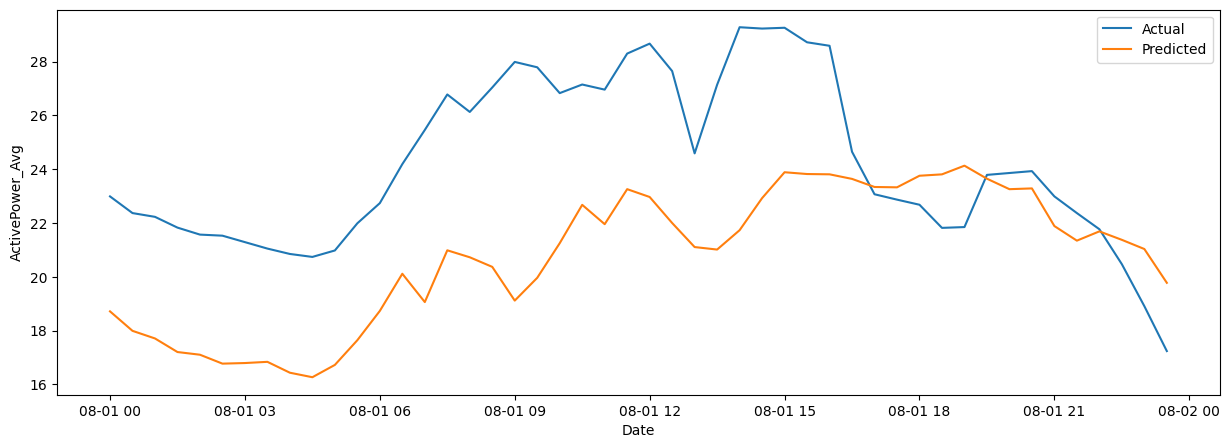

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = test_df['Date'][:48], y = test_df['ActivePower_Avg'][:48], label = 'Actual')
sns.lineplot(x = test_df['Date'][:48], y = all_pred[:48], label = 'Predicted')

In [22]:
mean_squared_error(test_df['ActivePower_Avg'][:48], all_pred[:48])

20.242355055996953